In [305]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots.constants.color import rgb
from tueplots import figsizes

# Update global settings with JMLR base and your customizations
plt.rcParams.update(bundles.jmlr2001())
# Additional customizations for 12 pt font
plt.rcParams.update({"font.size": 12})

### Get the data

In [180]:
data = {
    'CL_Y': [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
             3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
             4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
    'V': [3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7,
          3, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7],
    'S': [100, 500, 1000, 10000] * 9,
    'ANN': [0.2267, 0.2667, 0.2067, 0.2170, 0.2667, 0.2367, 0.2467, 0.2110, 0.2666, 0.2700, 0.2067, 0.2060,
            0.2600, 0.3667, 0.3000, 0.3287, 0.2000, 0.3733, 0.3253, 0.3373, 0.1667, 0.3933, 0.3200, 0.3373,
            0.3467, 0.4000, 0.4567, 0.4803, 0.4000, 0.4867, 0.5133, 0.4443, 0.4333, 0.5267, 0.4767, 0.4633],
    'DT': [0.2333, 0.3000, 0.2167, 0.2357, 0.2777, 0.2333, 0.2487, 0.2540, 0.2555, 0.2300, 0.3200, 0.2540,
           0.3867, 0.4333, 0.3998, 0.3933, 0.4000, 0.4467, 0.3910, 0.4493, 0.2667, 0.4933, 0.3544, 0.4493,
           0.4467, 0.4667, 0.4999, 0.5280, 0.5000, 0.5600, 0.5355, 0.5527, 0.5000, 0.5867, 0.5103, 0.5597],
    'LR': [0.2000, 0.2000, 0.2170, 0.2170, 0.1800, 0.1800, 0.2060, 0.2060, 0.1667, 0.1667, 0.2060, 0.2060,
           0.2267, 0.3333, 0.3267, 0.3323, 0.2333, 0.3800, 0.3220, 0.3410, 0.1667, 0.5200, 0.3300, 0.3410,
           0.3733, 0.4333, 0.4899, 0.4899, 0.4000, 0.5067, 0.4657, 0.4657, 0.4333, 0.5200, 0.4900, 0.4900]
}

table3_orig = pd.DataFrame(data)
table3_orig['S'] = pd.factorize(table3_orig['S'], sort = True)[0]

In [181]:
table3 = pd.read_csv('../dat/table3.csv')
table3['Sample_Size'] = table3['Sample_Size'].factorize()[0]
models = ['ANN', 'DT', 'LR']

### Figure 1 -- All in one plot

In [315]:
# Plot 1
by_CLY = table3.groupby('Classes_Dep_Var')[models].mean().mean(axis=1)
by_CLY_orig = table3_orig.groupby('CL_Y')[models].mean().mean(axis=1)
# Plot 2
by_N = table3.groupby('Sample_Size')[models].mean().mean(axis=1)
by_N_orig = table3_orig.groupby('S')[models].mean().mean(axis=1)
# Plot 3
by_V = table3.groupby('Num_Ind_Vars')[models].mean().mean(axis=1)
by_V_orig = table3_orig.groupby('V')[models].mean().mean(axis=1)
# Plot 4
by_M = table3[models + ['RF']].mean()
by_M_orig = table3_orig[models].mean()

In [316]:
table3_orig.groupby('S')[models].mean().mean(axis=1)

S
0    0.304196
1    0.381856
2    0.354878
3    0.362596
dtype: float64

### Interactions in Continuous Case -- All in one plot

In [308]:
# M x CLY
M_CLY = table3.groupby('Classes_Dep_Var')[models].mean()
M_CLY_orig = table3_orig.groupby(['CL_Y'])[models].mean()
# M x S
M_S = table3.groupby('Sample_Size')[models].mean()
M_S_orig = table3_orig.groupby(['S'])[models].mean()
# M x V
M_V = table3.groupby('Num_Ind_Vars')[models].mean()
M_V_orig = table3_orig.groupby(['V'])[models].mean()
# CLY x S
CLY_S = table3.groupby(['Classes_Dep_Var', 'Sample_Size'])[models].mean().mean(axis=1)
CLY_S_orig = table3_orig.groupby(['CL_Y', 'S'])[models].mean().mean(axis=1)
# CLY x V
CLY_V = table3.groupby(['Classes_Dep_Var', 'Num_Ind_Vars'])[models].mean().mean(axis=1)
CLY_V_orig = table3_orig.groupby(['CL_Y', 'V'])[models].mean().mean(axis=1)
# V x S
V_S = table3.groupby(['Num_Ind_Vars', 'Sample_Size'])[models].mean().mean(axis=1)
V_S_orig = table3_orig.groupby(['V', 'S'])[models].mean().mean(axis=1)
# Colors
colors = [rgb.tue_blue, rgb.tue_green, rgb.tue_red]

In [302]:
M_S.index

Index([0, 1, 2, 3], dtype='int64', name='Sample_Size')

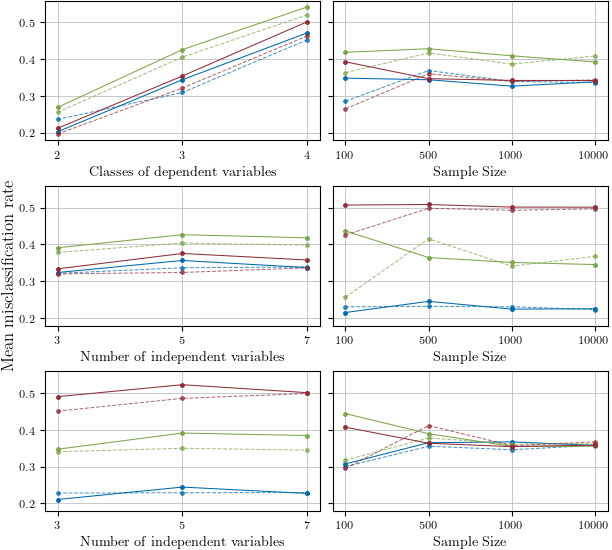

In [310]:
plt.rcParams.update(figsizes.jmlr2001(nrows=3, ncols=2))

fig, axs = plt.subplots(3, 2, sharey = True)

# Plot 1: M x CLY
for i in np.arange(3): 
    axs[0, 0].plot(M_CLY.index, M_CLY.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 0].plot(M_CLY_orig.index, M_CLY_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[0, 0].set_xticks([2, 3, 4])  # Positions for the categories
axs[0, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[0, 0].set_xlabel("Classes of dependent variables")

# Plot 2: M x S
for i in np.arange(3): 
    axs[0, 1].plot(M_S.index, M_S.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[0, 1].plot(M_S_orig.index, M_S_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[0, 1].set_xlabel("Sample Size")
axs[0, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[0, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[0, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Plot 3: M x V
for i in np.arange(3): 
    axs[1, 0].plot(M_V.index, M_V.values[:,i], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 0].plot(M_V_orig.index, M_V_orig.values[:,i], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[1, 0].set_xticks([3, 5, 7])  # Positions for the categories
axs[1, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)
axs[1, 0].set_xlabel("Number of independent variables")

# Plot 4: CLY x S
for i in np.arange(3): 
    axs[1, 1].plot(np.arange(4), CLY_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[1, 1].plot(np.arange(4), CLY_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[1, 1].set_xlabel("Sample Size")
axs[1, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[1, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[1, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Plot 5: CLY x V
for i in np.arange(3): 
    axs[2, 0].plot([3, 5, 7], CLY_V.values[i*3:i*3+3], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 0].plot([3, 5, 7], CLY_V_orig.values[i*3:i*3+3], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[2, 0].set_xlabel("Number of independent variables")
axs[2, 0].set_xticks([3, 5, 7])  # Positions for the categories
axs[2, 0].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# Plot 4: V x S
for i in np.arange(3): 
    axs[2, 1].plot(np.arange(4), V_S.values[i*4:i*4+4], '.-', ms=5, lw=0.75, color=colors[i], label="replication") 
    axs[2, 1].plot(np.arange(4), V_S_orig.values[i*4:i*4+4], '.--', ms=5, lw=0.75, color=colors[i], alpha=0.7, label="original")
axs[2, 1].set_xlabel("Sample Size")
axs[2, 1].set_xticks(np.arange(0, 4))  # Positions for the categories
axs[2, 1].set_xticklabels(['100', '500', '1000', '10000'])  # Labels for the categories
axs[2, 1].grid(axis="both", color=rgb.tue_gray, linewidth=0.5)

# axs[0, 0].legend()
fig.text(-0.01, 0.5, 'Mean misclassification rate', ha='center', va='center', rotation='vertical')

fig.savefig("../doc/fig/020304_Interactions_cont.pdf")
plt.show()

## Trying ANOVA, should move to another notebook

In [159]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Convert categorical variables
table3_orig['CL_Y'] = table3_orig['CL_Y'].astype('category')
table3_orig['V'] = table3_orig['V'].astype('category')
table3_orig['S'] = table3_orig['S'].astype('category')  # Treating S as categorical for ANOVA

# Reshape data into long format
df_long = table3_orig.melt(id_vars=['CL_Y', 'V', 'S'], 
                        value_vars=['ANN', 'DT', 'LR'], 
                        var_name='Model', 
                        value_name='Score')

# Convert Model into categorical
df_long['Model'] = df_long['Model'].astype('category')

In [163]:
# Fit the ANOVA model with only main effects and two-way interactions
model = smf.ols('Score ~ C(CL_Y) + C(V) + C(S) + C(Model) + \
                 C(CL_Y):C(V) + C(CL_Y):C(S) + C(CL_Y):C(Model) + \
                 C(V):C(S) + C(V):C(Model) + C(S):C(Model)', data=df_long).fit()

# Perform ANOVA (Type II)
anova_results = sm.stats.anova_lm(model, typ=2)

# Print results
print(anova_results.round(4))

                  sum_sq    df         F  PR(>F)
C(CL_Y)           1.1253   2.0  528.1058  0.0000
C(V)              0.0067   2.0    3.1405  0.0496
C(S)              0.0889   3.0   27.8093  0.0000
C(Model)          0.0990   2.0   46.4691  0.0000
C(CL_Y):C(V)      0.0087   4.0    2.0481  0.0973
C(CL_Y):C(S)      0.0654   6.0   10.2347  0.0000
C(CL_Y):C(Model)  0.0209   4.0    4.9101  0.0015
C(V):C(S)         0.0118   6.0    1.8506  0.1022
C(V):C(Model)     0.0016   4.0    0.3871  0.8171
C(S):C(Model)     0.0081   6.0    1.2731  0.2814
Residual          0.0724  68.0       NaN     NaN


In [168]:
import pdfplumber
import pandas as pd

pdf_path = "paper.pdf"  # Replace with your file

tables = []
with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        table = page.extract_table({"snap_tolerance": 8})  # Adjust tolerance
        if table:
            df = pd.DataFrame(table[1:], columns=table[0])
            tables.append(df)

# Print Table 3 (Index 2)
if len(tables) >= 3:
    print(f"Table 3:\n{tables[2]}")
else:
    print("Table 3 not found!")

Table 3:
  CL_Y\n2 3 4\nCA CL_X S Misclassificationerrors CA CL_X S Misclassificationerrors CA CL_X S Misclassificationerrors\nANN DT LR ANN DT LR ANN DT LR
0  1 2 100 0.4000 0.4000 0.4333 1 2 100 0.5000 0....                                                                                               


In [170]:
df = tables[2]  # Table 3 (Index 2)

# Replace newline characters with spaces
df.columns = [col.replace("\n", " ") for col in df.columns]

print(df.head())

  CL_Y 2 3 4 CA CL_X S Misclassificationerrors CA CL_X S Misclassificationerrors CA CL_X S Misclassificationerrors ANN DT LR ANN DT LR ANN DT LR
0  1 2 100 0.4000 0.4000 0.4333 1 2 100 0.5000 0....                                                                                            
